<Figure size 432x288 with 0 Axes>

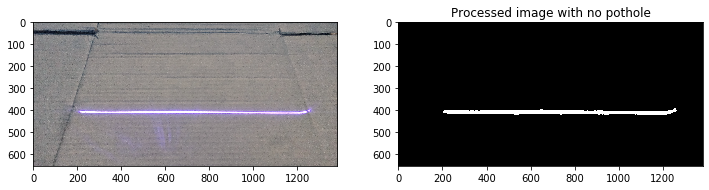

<Figure size 432x288 with 0 Axes>

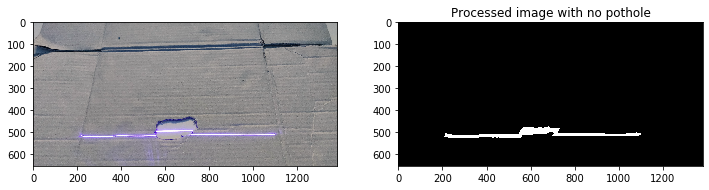

<ipython-input-58-899294bcf0c5>:43: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  (score, diff) = compare_ssim(thresh11, thresh1)


TypeError: cannot unpack non-iterable numpy.float64 object

In [58]:
#importing 
import cv2
import numpy as np
import matplotlib.pyplot as plt

#reading images
img = cv2.imread('no.jpg')
img1 = cv2.imread('maybe.jpg')

# resize image
width = int(img.shape[1] * 30 / 100)
height = int(img.shape[0] * 30 / 100)
dim = (width, height)
img = cv2.resize(img, dim)
img1 = cv2.resize(img1, dim)

#choosing only red channel
red=img[:,:,2]
red1=img1[:,:,2]

# choosing pixels in 200 to 255 range applying gaussianblur, binary thresholding and otsu thresholding
lowerb = np.array([200])
upperb = np.array([255])
red_line = cv2.inRange(red, lowerb, upperb)
red_line = cv2.GaussianBlur(red_line,(15,15),0)
ret,thresh1 = cv2.threshold(red_line,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
red_line1 = cv2.inRange(red1, lowerb, upperb)
red_line1 = cv2.GaussianBlur(red_line1,(15,15),0)
ret,thresh11 = cv2.threshold(red_line1,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#displaying images
plt.figure()
fig, axes = plt.subplots(1,2, figsize = (12,4))
axes[0].imshow(img),plt.title('Image with no pothole')
axes[1].imshow(thresh1,'gray'),plt.title('Processed image with no pothole')
plt.show()
plt.figure()
fig, axes = plt.subplots(1,2, figsize = (12,4))
axes[0].imshow(img1),plt.title('Image with no pothole')
axes[1].imshow(thresh11,'gray'),plt.title('Processed image with no pothole')
plt.show()
from skimage.measure import compare_ssim
(score, diff) = compare_ssim(thresh11, thresh1,full=)
print("SSIM: {}".format(score))

In [22]:
template = cv2.imread('template.jpg',0)
template = cv2.GaussianBlur(template,(5,5),0)
match = cv2.matchTemplate(thresh1, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.6
position = np.where(match >= threshold) #get the location of template in the image
print(match)
for point in zip(*position[::-1]): #draw the rectangle around the matched template
    cv2.rectangle(thresh1, point, (point[0] + width, point[1] + height), (153, 22, 0), 0)
cv2.imshow('Template Found', thresh1)
cv2.waitKey(0)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... -0.11688598 -0.11565299
  -0.10891739]
 [ 0.          0.          0.         ... -0.1168856  -0.11565299
  -0.10891708]
 [ 0.          0.          0.         ... -0.11688572 -0.11565284
  -0.10891755]]


-1

In [26]:
histg = cv2.calcHist([thresh1],[0],None,[256],[0,256])  

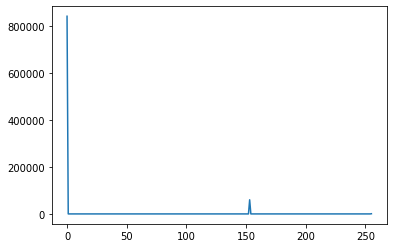

In [27]:
plt.plot(histg) 
plt.show() 

In [49]:
print(thresh1.shape)


(652, 1382)


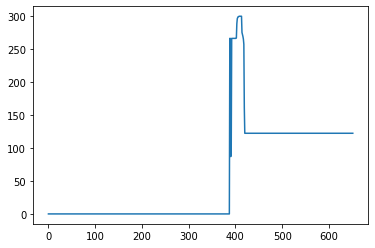

In [48]:

histogram=[]
for i in range(652):
    histogram.append(sum(thresh1[i,:]/255))
plt.plot(range(652),histogram) 

In [55]:
from skimage.measure import compare_ssim
(score, diff) = compare_ssim(thresh1, thresh1, full=True)
print("SSIM: {}".format(score))

<ipython-input-55-0e3ccf9ff0c7>:2: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  (score, diff) = compare_ssim(thresh1, thresh1, full=True)


SSIM: 1.0


In [53]:
pip install scikit-image --user

  Using cached scikit_image-0.17.1-cp38-cp38-win_amd64.whl (11.5 MB)
  Using cached networkx-2.4-py3-none-any.whl (1.6 MB)
  Using cached imageio-2.8.0-py3-none-any.whl (3.3 MB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Using cached pooch-1.1.0-py3-none-any.whl (44 kB)
  Using cached PyWavelets-1.1.1-cp38-cp38-win_amd64.whl (4.3 MB)
  Using cached packaging-20.3-py2.py3-none-any.whl (37 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached requests-2.23.0-py2.py3-none-any.whl (58 kB)
  Using cached urllib3-1.25.9-py2.py3-none-any.whl (126 kB)
  Using cached idna-2.9-py2.py3-none-any.whl (58 kB)
  Using cached chardet-3.0.4-py2.py3-none-any.whl (133 kB)


In [59]:
edges = cv2.Canny(thresh11, 50, 150, apertureSize=3)

In [60]:
minLineLength = 20 #img.shape[1] - 300
lines = cv2.HoughLinesP(image=edges, rho=0.02, theta=np.pi / 500,     threshold=10, lines=np.array([]), minLineLength=minLineLength, maxLineGap=2)

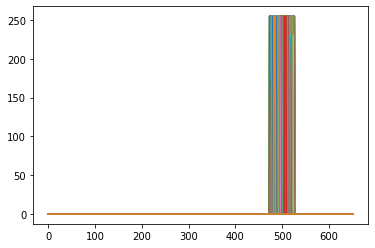

In [66]:
a, b, c = lines.shape

for i in range(a):
    cv2.line(thresh11, (lines[i][0][0], lines[i][0][1]), (lines[i][0][2],  lines[i][0][3]), (0, 0, 255), 2, cv2.LINE_AA)
plt.figure()
plt.plot(thresh11)
plt.show()

In [72]:
pip install PIL

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


In [71]:

import Image
import ImageChops

ModuleNotFoundError: No module named 'Image'